# Introduction
In a series of weekly articles, I will be covering some important topics of statistics with a twist.

The goal is to use Python to help us get intuition on complex concepts, empirically test theoretical proofs, or build algorithms from scratch. In this series, you will find articles covering topics such as random variables, sampling distributions, confidence intervals, significance tests, and more.

At the end of each article, you can find exercises to test your knowledge. The solutions will be shared in the article of the following week.

Articles published so far:
- [Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)
- [From Binomial to Geometric and Poisson Random Variables with Python](https://towardsdatascience.com/geometric-and-poisson-random-variables-with-python-e5dcb63d6b55)
- [Sampling Distribution of a Sample Proportion with Python](https://towardsdatascience.com/sampling-distributions-with-python-f5a5f268f636)
- [Confidence Intervals with Python](https://towardsdatascience.com/confidence-intervals-with-python-bfa28ebb81c)
- [Significance Tests with Python](https://towardsdatascience.com/significance-or-hypothesis-tests-with-python-7ed35e9ac9b6)
- Two-sample Inference for the Difference Between Groups with Python

As usual the code is available on my [GitHub](https://github.com/luisroque/College_Statistics_with_Python).

# Comparing Population Proportions

Portuguese local election of 2021 will be held on September 26 of the same year. Imagine that one of the candidates for the city of Porto was interest in comparing the proportion of men and women that will vote for him. During that weekend a new poll comes out with the following information: from a sample of 1000 men, 62% will vote for him and from a sample of 1000 women, 57% will vote for him. These are in reality two Bernoulli distributions which we can defined by the parameters:

$$\begin{align}
\mu_{men} &= p_{men} \\
\sigma_{men}^2 &= p_{men} \cdot(1-p_{men})
\end{align}$$

In [1]:
from scipy.stats import bernoulli, norm
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from graphviz import Digraph

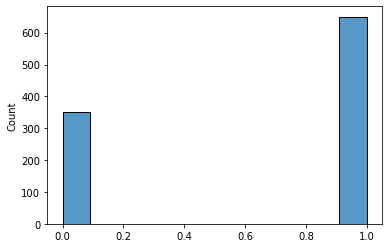

In [10]:
# Theoretical parameters for men
p1 = 0.65
n1=1000
n = n1

μ_1 = p1
var_1 = p1*(1-p1)

dist_men = np.concatenate((np.ones(int(p1*n)), np.zeros(int(n-(p1*n)))))
sns.histplot(dist_men);

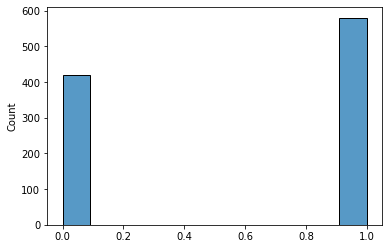

In [11]:
# Theoretical parameters for women
p2 = 0.58
n2 = n

μ_2 = p2
var_2 = p2*(1-p2)

dist_women = np.concatenate((np.ones(int(p2*n)), np.zeros(int(n-(p2*n)))))
sns.histplot(dist_women);

Remember that we want to figure out if there is a meaningful difference in the way men and women vote for the candidate. In reality, we want to come up with a 95% confidence interval for that difference.

Because the sample size is large enough we can assume that the sampling distributions of the sample proportions can be approximated by a normal distribution. In previous articles we already saw some of the properties of these distributions:

$$\begin{align}
\mu_{\bar p_1}&=p_1 \\
\sigma_{\bar p_1}^2 &= \frac{p_1(1-p_1)}{n_1}
\end{align}$$

Notice that to create the poll, they took 1000 samples from the original distribution and then calculated the mean from that sample. This procedure is equivalent to taking a sample from the sampling distribution of sample proportions.

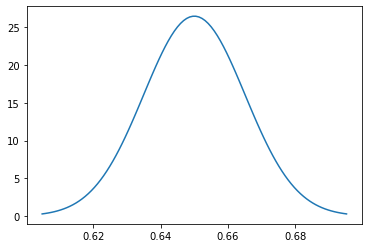

In [12]:
# Sampling distribution of sample proportion for men

mu = p1
variance = p1*(1-p1)/n
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, mu, sigma));

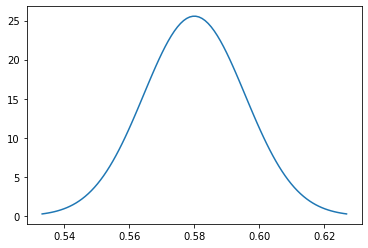

In [13]:
# Sampling distribution of sample proportion for women

mu = p2
variance = p2*(1-p2)/n
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, mu, sigma));

In fact, we are not interest in the individual distributions for men and women. Our interest is on their differences, so let's create the sampling distribution of $\bar p_1 - \bar p_2$. For that, we need to define its parameters:

$$\begin{align}
\mu_{\bar p_1 - \bar p_2} &= p_1 - p_2 \approx \bar p_1 - \bar p_2 \\
\sigma_{\bar p_1 - \bar p_2}^2 &= \frac{p_1(1-p1)}{n_1} + \frac{p_2(1-p2)}{n_2} \approx \frac{\bar p_1(1-\bar p1)}{n_1} + \frac{\bar p_2(1-\bar p2)}{n_2}
\end{align}$$

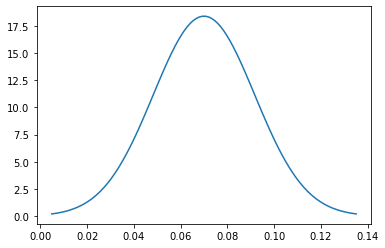

In [14]:
# Sampling distribution of sample proportion for the difference between men and women

mu = p1-p2
variance = p1*(1-p1)/n + p2*(1-p2)/n
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, mu, sigma));

The confidence interval that we want to calculate states that there is a 95% chance that $p_1 - p_2$ is within $1.96 \cdot \sigma_{\bar p_1 - \bar p_2}$.

In [15]:
# Calculating the number of standard deviations required for a 95% interval

norm.ppf(0.975)

1.959963984540054

Let's calculate our interval.

In [16]:
np.sqrt(variance) * norm.ppf(0.975)

0.042540701104107376

Now we know that there is a 95% chance that the true difference of the proportions is within 0.04254 of the actual difference of the sample proportions.

In [17]:
print(f'The 95% CI is: [{np.round(p1-p2 - np.sqrt(variance) * norm.ppf(0.975), 3)},{np.round(p1-p2 + np.sqrt(variance) * norm.ppf(0.975), 3)}]')

The 95% CI is: [0.027,0.113]


The candidate can conclude that there is a 95% chance that men are more likely to vote for him than women. Notice that the value 0 (no difference) is not contained in the interval.

# Hypothesis test comparing population proportions

We can be even more direct in our approach. We can define a hypothesis test to evaluate if in fact that is a difference.

We start by defining our null hypothesis, which represents the no difference scenario. Conversely, our alternative hypothesis states that there is a difference.

$$\begin{align}
H_0: p_1 - p_2 = 0 \\
H_a: p_1 - p_2 \neq 0
\end{align}$$

Thus, we want to calculate the $P(\bar p_1 - \bar p_2 | H_0)$. If this probability is less than the significance level defined for the problem, we will reject our null hypothesis and accept that there is a difference between how men and women vote for the candidate. In other words, assuming that the true proportions are equal, we want to know what is the probability of getting something as extreme as the value of $\bar p_1 - \bar p_2$.

$$\begin{align}
p_0 &= \frac{n_1 \cdot p_1 + n_2 \cdot p_2}{n_1 + n_2} \\
n &= n_1 = n_2 \\
z &= \frac{(\bar p_1 - \bar p_2) - 0}{\sqrt{2 \cdot \frac{p_0(1-p_0)}{n}}}
\end{align}$$

In [28]:
p0 = (n1*p1+n2*p2)/(n1+n2)
z = ((p1 - p2) - 0) /(np.sqrt(2*(p0*(1-p0)/n)))
z

3.2167337783899304

We can now compare our z-statistic with the critical value for a significance level of 5%.

In [34]:
z_critical = norm.ppf(0.975)
z_critical

1.959963984540054

In [35]:
z > z_critical

True

Our z-statistic is greater than the critical value. In other words, there is a 5% chance of sampling a z-statistic greater than the critical value assuming our null hypothesis. In this scenario we reject $H_0$, which means that we accept that there is a difference between men and women voting for the candidate.

# Statistical Significance of Experiment

In an experiment aimed at studying the effect of fake news on engagement, a group of 500 people was randomly assigned to two different groups. After randomization, each person received a smartphone with only a social media app that they could use to follow the news and updates from his or her friends.

The first group received fake news at least two times a day, while the second group did not receive any. After 30 days, the time spent on the social media app was measured. The conductors of the experiment found that the average time per day spent on the app by the first group was approximately 12 minutes greater than the second group.

In [42]:
gra = Digraph()

gra.node('a', '500')
gra.node('b', '#1\n Fake news')
gra.node('c', '#2\n No fake news')
gra.edges(['ab', 'ac'])

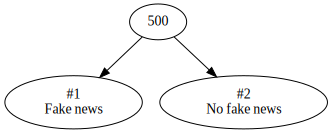

In [43]:
gra

In [128]:
g1 = np.random.normal(3, 1, size=250)
g2 = np.random.normal(2.2, 1, size=250)

In [129]:
print('Group 1: ' + str(np.round(g1.mean(),1)) + 'h')
print('Group 2: ' + str(np.round(g2.mean(),1)) + 'h')

Group 1: 3.0h
Group 2: 2.2h


To be able to understand the significance of this result, we need to re-randomize the results into two new groups and measure the difference between the mean of the new groups. We repeat the simulation 200 times.

In [130]:
groups_ind = np.zeros((200, 500))
for i in range(200):
    groups_ind[i] = (np.random.choice(np.arange(500, dtype=np.int32), size=500, replace=False))

In [131]:
groups_ind = groups_ind.astype('int32')

In [132]:
g = np.concatenate((g1,g2))

In [133]:
g1_rand = g[groups_ind][:,:250]
g2_rand = g[groups_ind][:,250:]

g1_rand_mean = g1_rand.mean(axis=0)
g2_rand_mean = g2_rand.mean(axis=0)

diff_g = g1_rand_mean - g2_rand_mean

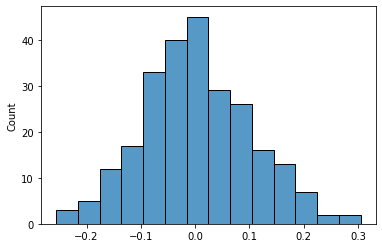

In [147]:
sns.histplot(diff_g);

We can see that the number of times that we had a difference greater than 0.2 is quite small. But is it statistically significant?

In [137]:
diff_g[diff_g>=0.2].shape[0]/diff_g.shape[0]

0.024

Suppose that a significance level of 5% was established prior to the start of the experiment. In that case, we see that our result is statistically significant, as the probability of observing a difference of 12 minutes in the 200 simulations with the re-randomized groups is only 2.4%. If this was due to chance it would happen only 6 in 200 times.

# Conclusion

In this article, we covered how confidence intervals and hypothesis tests can be applied to compare differences between samples from two populations. It gives us a way to understand if the differences are actually statistically significant. We applied the ideas to an experiment that uses simulation and re-randomization to test the difference between a treatment and a control group.

# Exercises

You will get the solutions on next week's article.

1. Physicians had a hypothesis that the mean time spent in the hospital due to Covid-19 before and after the vaccine changed. A group of 1,000 patients was randomized between a treatment group and a control group. The treatment group had already taken the vaccine while the control group did not. The results show that the mean time spent in the hospital by the treatment group was 10 days less than the time spent by the control group. The table below summarizes the results for the 1,000 re-randomizations of the data. Based on the data, what is the probability of the treatment group's mean is smaller than the one from the control group by 10 days or more? What can you conclude from the experiment's result (assuming a 5% significance level)?

In [160]:
diff = [[-17.5,1],
[-15.0, 6],
[-12.5, 15],
[-10.0, 41],
[-7.5, 82],
[-5.0, 43],
[-2.5, 150],
[0., 167],
[2.5, 132],
[5.0, 127],
[7.5, 173],
[10.0, 38],
[12.5, 18],
[15.0, 6],
[17.5, 1]]

### Answers from last week

1. According to a large poll from last year, about 85% of houses in Porto have access to high-speed internet. Marco wondered if the proportion had changed and took a random sample of 80 houses and found that 75 had access to high-speed internet. He wants to use this sample data to test if the proportion actually changed. Assuming that the conditions for inference were met, what would you conclude about the proportion of houses with hight-speed internet considering a significance level of 1%?

In [437]:
p_0 = 0.85
p = 75/80
n = 80
α = 0.01

z = (p-p_0)/np.sqrt(p_0*(1-p_0)/n)
z

2.191785018798024

In [438]:
p_value = (1-norm.cdf(z))*2 # see that Marco wants to check if the proportion changed, so it is a two-tail test

In [439]:
if p_value < α:
    print("Reject H0")
else:
    print("Fail to Reject H0")

Fail to Reject H0


2. Marta owns a fruit store and receives watermelons weekly. The supplier states that they are supposed to weigh 1kg. Marta decides to weigh a random sample of 100 watermelons and finds a mean weight of 850g and a standard deviation of 200g. She wants to use this sample data to test if the mean is smaller than the one claimed by the supplier and, if this is the case, renegotiate their contract. Assuming that the conditions for inference were met, what should Marta do (consider a significance level of 5%)?

In [453]:
μ_0 = 1
μ = 0.850
s = 0.2
n = 100
α = 0.05

t_star = (μ-μ_0)/(s/np.sqrt(n))
t_star

-7.500000000000001

In [454]:
p_value = t.cdf(t_star, df=n-1)

In [456]:
if p_value < α:
    print("Reject H0")
else:
    print("Fail to Reject H0")

Reject H0


Marta should renegotiate the contract with the supplier as the claim that the watermelons weigh 1kg is not true for a significance level of 5%.